In [45]:
# useful article about OHLC data aggregation:
# applicable to websocket streams of tick by tick data
# https://blog.quantinsti.com/tick-tick-ohlc-data-pandas-tutorial/


In [46]:
# jupyter did not want to load already installed talib library 
# so had to reinstall it via anaconda as well 
#!conda install -c conda-forge ta-lib
import talib as ta
import yfinance as yf

In [47]:
import pandas as pd
import sqlite3

# custom function imports
from functions_ml import *

In [48]:
# sqlite database structure is following:
#
#sqlite> .header on
#sqlite> .mode column
#sqlite> select * from alpaca_websocket_stream_data LIMIT 10;
#timestamp                            symbol  price   size  exchange  conditions  tape  id   
#-----------------------------------  ------  ------  ----  --------  ----------  ----  -----
#2022-07-19 15:49:25.477387108-04:00  AAPL    150.8   100   V         ['@']       C     10807
#32022-07-19 15:49:27.252579851-04:00  AAPL    150.81  3     V         ['@', 'I']  C     10808
#2022-07-19 15:49:27.252579851-04:00  AAPL    150.81  100   V         ['@']       C     10809
#2022-07-19 15:49:27.666163652-04:00  AAPL    150.81  100   V         ['@']       C     10810
#2022-07-19 15:49:27.666164795-04:00  AAPL    150.81  200   V         ['@']       C     10811
#2022-07-19 15:49:29.248316808-04:00  AAPL    150.79  100   V         ['@']       C     10812
#2022-07-19 15:49:32.963910211-04:00  AAPL    150.78  35    V         ['@', 'I']  C     10813
#2022-07-19 15:49:36.611092454-04:00  AAPL    150.77  2     V         ['@', 'I']  C     10814
#2022-07-19 15:49:36.612940345-04:00  AAPL    150.77  100   V         ['@']       C     10815
#2022-07-19 15:49:37.083678369-04:00  AAPL    150.76  100   V         ['@']       C     10816
#sqlite> 





# Exploratory data wrangling
optionally uncomment the code to get insights to individual steps

In [49]:
# connect to sqlite database and get all data where symbol is AAPL
# symbol is external variable
# pandas to onnect to database and aggregate price data to 1 minute granularity in pandas

#symbol='AAPL'
#
#conn = sqlite3.connect("alpaca_websocket_stream_data.db")
#c = conn.cursor()
#c.execute("SELECT * FROM alpaca_websocket_stream_data WHERE symbol = ?", (symbol,))
#data = c.fetchall()
#conn.close()

In [50]:
#data

In [51]:
# LOAD ONE DAY BACK

# connect to sqlite database and get all data where symbol is AAPL
# timestamp is from 24 hours ago to now
#conn = sqlite3.connect("alpaca_websocket_stream_data.db")
#c = conn.cursor()
#c.execute("SELECT * FROM alpaca_websocket_stream_data WHERE symbol = 'AAPL' AND timestamp BETWEEN datetime('now', '-1 month') AND datetime('now')")
#data = c.fetchall()
#conn.close()

In [52]:
#data

In [53]:
# load data to dataframe
#df = pd.DataFrame(data, columns=["timestamp", "symbol", "price", "size", "exchange", "conditions", "tape", "id"])

In [54]:
#df

In [55]:
#df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ns")

In [56]:
#df["date"] = df["timestamp"].dt.date

In [57]:
#df

In [58]:
#df = df.set_index("timestamp")


In [59]:
#df_resampled = df['price'].resample("1Min").ohlc(_method='ohlc')

In [60]:
#df_resampled

In [61]:
#df = df.reset_index()
#df = df.sort_values(by=["symbol"])

# Making function flow
one function for getting the data for specific ticker from the database
another function to process the df into resampled df with 1 and 5 min granularity

In [62]:
symbol = 'AAPL'
db_name = 'alpaca_websocket_stream_data.db'
table_name= 'alpaca_websocket_stream_data'
granularity = '1Min'

In [63]:
def get_ticker_data_from_db_days_back(symbol, db_name, table_name):
    # load data n days back from db
    # connect to sqlite database and get all data where symbol is AAPL for example
    # timestamp is from 24 hours ago to now
    # symbol, database name, table name are external variables
    
    conn = sqlite3.connect(db_name)
    c = conn.cursor()
    c.execute(f"SELECT * FROM  {table_name} WHERE symbol = ? AND timestamp BETWEEN datetime('now', '-7 days') AND datetime('now')", (symbol,))
    data = c.fetchall()
    conn.close()

    return data

In [64]:
data =  get_ticker_data_from_db_days_back(symbol, db_name, table_name)

In [65]:
data

[('2022-08-08 12:06:31.433462691-04:00',
  'AAPL',
  165.53,
  100,
  'V',
  "['@']",
  'C',
  5782),
 ('2022-08-08 12:06:36.680078094-04:00',
  'AAPL',
  165.55,
  3,
  'V',
  "['@', 'I']",
  'C',
  5783),
 ('2022-08-08 12:06:37.846831934-04:00',
  'AAPL',
  165.55,
  22,
  'V',
  "['@', 'I']",
  'C',
  5784),
 ('2022-08-08 12:06:38.395748672-04:00',
  'AAPL',
  165.55,
  100,
  'V',
  "['@']",
  'C',
  5785),
 ('2022-08-08 12:06:40.046341339-04:00',
  'AAPL',
  165.555,
  2,
  'V',
  "['@', 'I']",
  'C',
  5786),
 ('2022-08-08 12:06:40.276663432-04:00',
  'AAPL',
  165.56,
  100,
  'V',
  "['@']",
  'C',
  5787),
 ('2022-08-08 12:06:46.121391343-04:00',
  'AAPL',
  165.58,
  100,
  'V',
  "['@']",
  'C',
  5788),
 ('2022-08-08 12:06:51.930069615-04:00',
  'AAPL',
  165.585,
  100,
  'V',
  "['@']",
  'C',
  5789),
 ('2022-08-08 12:06:51.952792899-04:00',
  'AAPL',
  165.585,
  100,
  'V',
  "['@']",
  'C',
  5790),
 ('2022-08-08 12:06:52.042848997-04:00',
  'AAPL',
  165.585,
  300,


In [66]:
def get_ticker_data_from_db(symbol, db_name, table_name):
    # connect to sqlite database and get all data where symbol is AAPL for example
    # symbol, database name, table name are external variables
    
    conn = sqlite3.connect(db_name)
    c = conn.cursor()
    #c.execute("SELECT * FROM ? WHERE symbol = ?", (table_name, symbol,))
    c.execute(f"SELECT * FROM {table_name} WHERE symbol = ?", (symbol,))
    data = c.fetchall()
    conn.close()

    return data

In [67]:
#data =  get_ticker_data_from_db(symbol, db_name, table_name)

In [68]:
#data

In [69]:
# so now we have data

In [70]:
def resample_data(data, granularity='1Min'):
    # takes incoming data, converst it to dataframe
    # and resamples tick by tick 'price' column into new dataframe, returns resampled dataframe
    # granularity can be 1Min, 5Min, other granularities are also possible
    
    # load data to dataframe
    df = pd.DataFrame(data, columns=["timestamp", "symbol", "price", "size", "exchange", "conditions", "tape", "id"])
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ns")
    df = df.set_index("timestamp")
    df_res = df['price'].resample(granularity).ohlc(_method='ohlc')

    # the neural net and Random Forest models expect df with columns called
    # 'Date','Open', 'High', 'Low', 'Close', 'Adj Close'
    # so we need to slightly mod our resampled df
    df_res.reset_index(inplace=True)
    df_res.rename(columns={"timestamp": "Date", "open": "Open", "high": "High", "low": "Low", "close": "Close"}, inplace=True)
    df_res["Adj Close"] = df_res["Close"]
    
    # data stream is not continuous, there are gaps between days, we need to remove the gaps
    # by taking only rows wit values that are not NaN
    # very important, otherwise indicators will compute wrong values
    df_res = df_res[df_res['Close'] .notna()]
    
    #df_res.head()    

    return df_res    

In [71]:
df_res =  resample_data(data, granularity=granularity)

In [72]:
df_res

,Date,Open,High,Low,Close,Adj Close
0,2022-08-08 12:06:00-04:00,165.530,165.585,165.530,165.570,165.570
1,2022-08-08 12:07:00-04:00,165.565,165.575,165.400,165.420,165.420
2,2022-08-08 12:08:00-04:00,165.405,165.470,165.255,165.255,165.255
3,2022-08-08 12:09:00-04:00,165.220,165.240,165.015,165.040,165.040
4,2022-08-08 12:10:00-04:00,165.120,165.240,165.120,165.190,165.190
...,...,...,...,...,...,...
1589,2022-08-09 14:35:00-04:00,165.030,165.030,164.945,164.945,164.945
1590,2022-08-09 14:36:00-04:00,164.985,165.050,164.985,165.020,165.020
1591,2022-08-09 14:37:00-04:00,164.990,165.120,164.960,165.075,165.075
1592,2022-08-09 14:38:00-04:00,165.040,165.040,164.950,165.000,165.000


# Predictions
- now we have dataframe and can compute whatever indicators we want
- and then connect it to our predictive model and even visualize in streamlit

In [73]:
# load classifier, no need to initialize the loaded_rf
loaded_clf = joblib.load("./random_forest.joblib")
clf = loaded_clf

In [74]:
df_res = compute_technical_indicators(df_res)
df_res = compute_features(df_res)
df_res =define_target_condition(df_res)

In [75]:
df_res.tail()

,Date,Open,High,Low,Close,Adj Close,EMA5,EMA10,EMA15,EMA20,...,aboveEMA90,aboveEMA100,aboveEMA150,aboveEMA200,aboveUpperBB,belowLowerBB,aboveSAR,oversoldRSI,overboughtRSI,target_cls
1589,2022-08-09 14:35:00-04:00,165.030,165.03,164.945,164.945,164.945,164.975300,165.003729,165.040430,165.003729,...,-1,-1,-1,-1,-1,-1,1,-1,-1,0
1590,2022-08-09 14:36:00-04:00,164.985,165.05,164.985,165.020,165.020,164.990200,165.006687,165.037877,165.006687,...,-1,-1,-1,-1,-1,-1,1,-1,-1,0
1591,2022-08-09 14:37:00-04:00,164.990,165.12,164.960,165.075,165.075,165.018467,165.019108,165.042517,165.019108,...,-1,-1,-1,1,-1,-1,1,-1,-1,0
1592,2022-08-09 14:38:00-04:00,165.040,165.04,164.950,165.000,165.000,165.012311,165.015634,165.037202,165.015634,...,-1,-1,-1,-1,-1,-1,1,-1,-1,0
1593,2022-08-09 14:39:00-04:00,165.000,165.00,164.990,164.990,164.990,165.004874,165.010973,165.031302,165.010973,...,-1,-1,-1,-1,-1,-1,1,-1,-1,0


<AxesSubplot:>

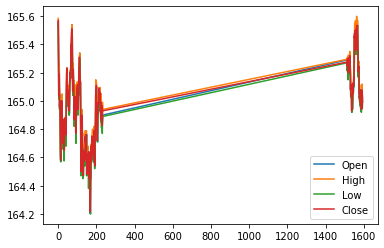

In [76]:
# --- plot whole dataframe ---
#df_res[['Open','High','Low','Close', 'EMA20']].plot()
df_res[['Open','High','Low','Close']].plot()

<AxesSubplot:>

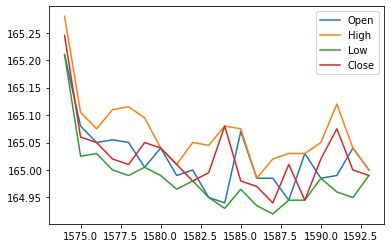

In [77]:
# --- plot tail of the dataframe ---
df_res[['Open','High','Low','Close']].iloc[-20:].plot()

In [78]:
# we need only smaller slice
df_res_cut = df_res.iloc[-202:].copy()

In [79]:
#new_df = predict_timeseries(new_df, clf)
predict_timeseries(df_res_cut, clf)

df length:  202
step:  115 predicted class:  1.0
step:  116 predicted class:  1.0
step:  117 predicted class:  0.0
step:  118 predicted class:  0.0
step:  119 predicted class:  0.0
step:  120 predicted class:  0.0
step:  121 predicted class:  0.0
step:  122 predicted class:  0.0
step:  123 predicted class:  0.0
step:  124 predicted class:  0.0
step:  125 predicted class:  0.0
step:  126 predicted class:  0.0
step:  127 predicted class:  0.0
step:  128 predicted class:  0.0
step:  129 predicted class:  0.0
step:  130 predicted class:  0.0
step:  131 predicted class:  0.0
step:  132 predicted class:  0.0
step:  133 predicted class:  0.0
step:  134 predicted class:  1.0
step:  135 predicted class:  1.0
step:  136 predicted class:  1.0
step:  137 predicted class:  1.0
step:  138 predicted class:  1.0
step:  139 predicted class:  1.0
step:  140 predicted class:  1.0
step:  141 predicted class:  1.0
step:  142 predicted class:  1.0
step:  143 predicted class:  1.0
step:  144 predicted class:

,Date,Open,High,Low,Close,Adj Close,EMA5,EMA10,EMA15,EMA20,...,aboveEMA150,aboveEMA200,aboveUpperBB,belowLowerBB,aboveSAR,oversoldRSI,overboughtRSI,target_cls,Buy,Long
115,2022-08-08 14:01:00-04:00,165.240,165.250,165.120,165.120,165.120,165.206277,165.189463,165.160976,165.189463,...,-1,-1,-1,-1,-1,-1,-1,0,1.0,165.120
116,2022-08-08 14:02:00-04:00,165.120,165.145,165.120,165.140,165.140,165.184185,165.180470,165.158354,165.180470,...,-1,-1,-1,-1,-1,-1,-1,0,1.0,165.140
117,2022-08-08 14:03:00-04:00,165.130,165.130,164.980,164.980,164.980,165.116123,165.144021,165.136060,165.144021,...,-1,-1,-1,-1,-1,-1,-1,0,0.0,NaN
118,2022-08-08 14:04:00-04:00,164.930,164.930,164.740,164.740,164.740,164.990749,165.070562,165.086552,165.070562,...,-1,-1,-1,1,-1,-1,-1,0,0.0,NaN
119,2022-08-08 14:05:00-04:00,164.740,164.790,164.480,164.500,164.500,164.827166,164.966824,165.013233,164.966824,...,-1,-1,-1,1,-1,1,-1,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,2022-08-09 14:35:00-04:00,165.030,165.030,164.945,164.945,164.945,164.975300,165.003729,165.040430,165.003729,...,-1,-1,-1,-1,1,-1,-1,0,0.0,NaN
1590,2022-08-09 14:36:00-04:00,164.985,165.050,164.985,165.020,165.020,164.990200,165.006687,165.037877,165.006687,...,-1,-1,-1,-1,1,-1,-1,0,1.0,165.020
1591,2022-08-09 14:37:00-04:00,164.990,165.120,164.960,165.075,165.075,165.018467,165.019108,165.042517,165.019108,...,-1,1,-1,-1,1,-1,-1,0,1.0,165.075
1592,2022-08-09 14:38:00-04:00,165.040,165.040,164.950,165.000,165.000,165.012311,165.015634,165.037202,165.015634,...,-1,-1,-1,-1,1,-1,-1,0,1.0,165.000


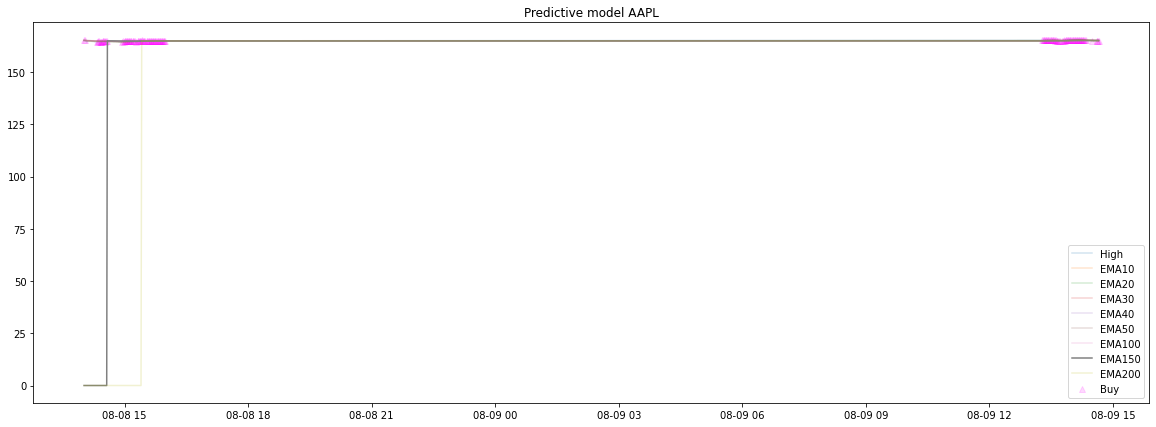

In [80]:
# when there is short history, the starts of EMAs will be anchored to zero, that will skew the graph
# best to run when you have more than 1000 datapoints (in this case minutes) 
plot_stock_prediction(df_res_cut, symbol)

In [81]:
## add new column to better visualize Long only trades
#df_res_cut['Long'] = df_res_cut['Buy'] * df_res_cut['Adj Close'] 
#df_res_cut['Long'].replace(0, np.nan, inplace=True) 



In [82]:
#df_res_cut

In [83]:
# takes longer to compute, but predicts 200 datapoints to validate visually

def predict_timeseries(df, clf):

    # making sure we have good dimensions
    # column will be rewritten later
    df["Buy"] = np.nan

    print("df length: ", len(df))

    # for i in range(len(df)):
    #    print('above sar: ', df["aboveSAR"][i])

    # iterate over last 20 rows in a dataframe
    # use df.iterrows() to iterate over rows
    #for i, row in df.tail(
    #    20
    #).iterrows():  # predict for small subset of data, otherwise it takes too long

    for i, row in df.iterrows():    # predict for each row

        X_cls_valid = [
            [
                df["aboveSAR"][i],
                df["aboveUpperBB"][i],
                df["belowLowerBB"][i],
                df["RSI"][i],
                df["oversoldRSI"][i],
                df["overboughtRSI"][i],
                df["aboveEMA5"][i],
                df["aboveEMA10"][i],
                df["aboveEMA15"][i],
                df["aboveEMA20"][i],
                df["aboveEMA30"][i],
                df["aboveEMA40"][i],
                df["aboveEMA50"][i],
                df["aboveEMA60"][i],
                df["aboveEMA70"][i],
                df["aboveEMA80"][i],
                df["aboveEMA90"][i],
                df["aboveEMA100"][i],
            ]
        ]

        y_cls_pred_valid = clf.predict(X_cls_valid)
        df["Buy"][i] = y_cls_pred_valid[0].copy()

        print("step: ", i, "predicted class: ", df["Buy"][i])


    # add new column to better visualize Long only trades
    # graphs will look better, since no anchoring to zero for short trades
    df['Long'] = df['Buy'] * df['Adj Close'] 
    df['Long'].replace(0, np.nan, inplace=True) 

    print(df.tail())

    return df

In [84]:
# inter trading day gaps in matplotlib issue proposed solution:
# https://stackoverflow.com/questions/39231410/ignoring-time-gaps-larger-than-x-mins-matplotlib-in-python

In [85]:
# reset index for better plotting without gaps with zooming function
df_res_cut.reset_index(inplace=True)    

In [86]:

def plot_stock_prediction_zoom(df, ticker):
    # --- plot only Long trades and zoom in on last data ---
    
    # plot  values and significant levels
    #df.reset_index(inplace=True)    
    
    # zoom in
    df = df.iloc[-200:]   # use eg. 50 for zooming in
    
    plt.figure(figsize=(20, 7))
    plt.title("Predictive model " + str(ticker))
    plt.plot(df.index, df["Adj Close"], label="High", alpha=0.4)

    plt.plot(df.index, df["EMA10"], label="EMA10", alpha=0.2)
    plt.plot(df.index, df["EMA20"], label="EMA20", alpha=0.2)
    plt.plot(df.index, df["EMA30"], label="EMA30", alpha=0.2)
    plt.plot(df.index, df["EMA40"], label="EMA40", alpha=0.2)
    plt.plot(df.index, df["EMA50"], label="EMA50", alpha=0.2)
    #plt.plot(df.index, df["EMA100"], label="EMA100", alpha=0.2)
    #plt.plot(df.index, df["EMA150"], label="EMA150", alpha=0.79)
    #plt.plot(df.index, df["EMA200"], label="EMA200", alpha=0.99)

    # this dataobject plotting gives intraday gaps since data from non trading time is not there
    #plt.scatter(
    #    df["Date"],
    #    #df["Buy"] * df["Adj Close"],
    #    df['Long'],
    #    label="Buy",
    #    marker="^",
    #    color="magenta",
    #    alpha=0.55,
    #)
    
    # workaround with plotting over index

    plt.scatter(
        df.index,
        #df["Buy"] * df["Adj Close"],
        df['Long'],
        label="Buy",
        marker="^",
        color="magenta",
        alpha=0.55,
    )    
    
    
    
    # lt.scatter(df.index, df['sell_sig'], label='Sell', marker='v')

    plt.legend()

    plt.show()

    return None

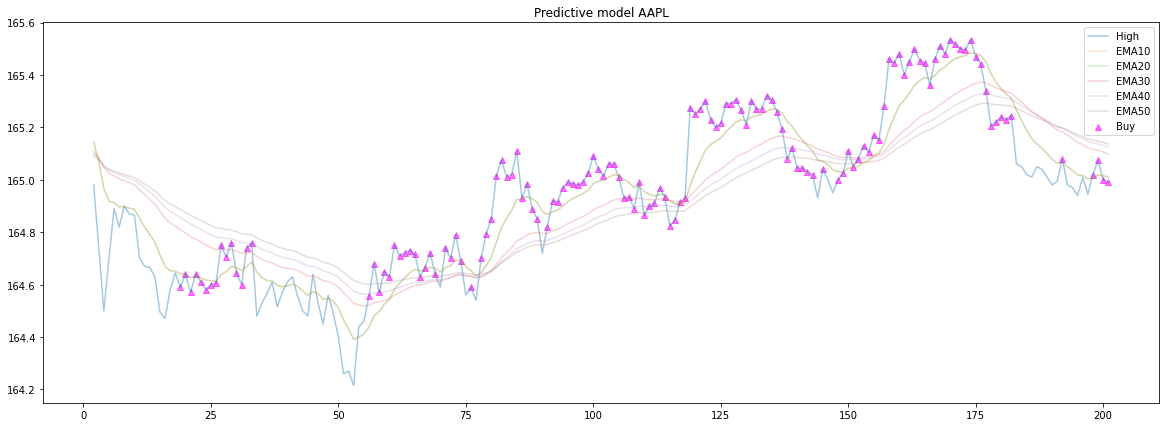

In [87]:
plot_stock_prediction_zoom(df_res_cut, symbol)

# Daemonize the script to run every minute
but running script every minute by cron should be more reliable, also prevents time drift

In [88]:
# --- UNCOMMENT TO RUN CONTINUOUSLY ---

#while True:
#    
#    #data =  get_ticker_data_from_db(symbol, db_name, table_name)
#    data =  get_ticker_data_from_db_days_back(symbol, db_name, table_name)
#    df_res =  resample_data(data, granularity=granularity)
#    
#    df_res = compute_technical_indicators(df_res)
#    df_res = compute_features(df_res)
#    df_res =define_target_condition(df_res)
#
#    # streamline for pred and viz
#    df_res_cut = df_res.iloc[-202:].copy()
#    predict_timeseries(df_res_cut, clf)
#    plot_stock_prediction(df_res_cut, symbol)
#
#    time.sleep(60)
